# EMC Effect

This notebook tries to find the EMC effect in the simulated neutrino data. The EMC effect is the observation that the cross section of a nucleus is different from the cross section of the same number of nucleons.

In [44]:
import matplotlib.pyplot as plt
import numpy as np

import km3pipe as kp
import km3modules as km
import km3io
from km3net_testdata import data_path
from particle import Particle

In [45]:
file = "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.132.root"

f = km3io.OfflineReader(data_path(file))

bjorken_x = f.w2list[:,7]
cross_section = f.w2list[:,14] #Differential cross section!
energies = f.mc_tracks.E[:,0]



In [46]:
bjorken_x = f.w2list[:,7]
cross_section = f.w2list[:,14] #Differential cross section!
energies = f.mc_tracks.E[:,0]

hydrogen = (f.mc_tracks.pdgid[:,1]==2212)
bjorken_x_H = bjorken_x[hydrogen]
cross_section_H = cross_section[hydrogen]
energies_H = energies[hydrogen]
interaction_channel_H = f.w2list[:,9][hydrogen]

oxygen = (f.mc_tracks.pdgid[:,1]==1000080160)
bjorken_x_O = bjorken_x[oxygen]
cross_section_O = cross_section[oxygen]
energies_O = energies[oxygen]
interaction_channel_O = f.w2list[:,9][oxygen]

In [47]:
boolean_H = (energies_H > 100) * (energies_H < 110)
boolean_O = (energies_O > 100) * (energies_O < 110)

In [48]:
def process_bins_with_error(cross_section,interaction_channel,quantity,bound1,bound2,bintype,bins):
    cs_DIS = np.zeros(bins)
    errors = np.zeros(bins)

    if bintype == 'log':
        quantity = np.log10(quantity)
        bound1 = np.log10(bound1)
        bound2 = np.log10(bound2)
        quantity_binned = np.logspace(bound1,bound2,base=10,num=bins)
    elif bintype == 'linear':
        quantity_binned = np.linspace(bound1,bound2,num=bins)
        
    binsize = (bound2-bound1)/bins
    i = 0
    q = bound1
    while i < bins-1:
        boolean_bin = (quantity>q) * (quantity<q+binsize)
        DIS_values = cross_section[boolean_bin*(interaction_channel==3)]
        
        cs_DIS[i] = np.mean(DIS_values)
        errors[i] = np.std(DIS_values)/np.sqrt(len(DIS_values))
                              
        i = i+1
        q = q+binsize
    
    quantity_binned = quantity_binned + (quantity_binned[1]-quantity_binned[0])/2
    return quantity_binned, cs_DIS, errors

In [49]:
E_H, cs_H, err_H = process_bins_with_error(cross_section_H[boolean_H],interaction_channel_H[boolean_H],bjorken_x_H[boolean_H],0,1,'linear',10)
E_O, cs_O, err_O = process_bins_with_error(cross_section_O[boolean_O],interaction_channel_O[boolean_O],bjorken_x_O[boolean_O],0,1,'linear',10)



In [50]:
norm = 16
ratio = (cs_O/norm)/cs_H
errors = (err_H/cs_H) + ((cs_O/norm)*(err_O/norm))/cs_H**2


/project/antares/jurjanbootsma/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/project/antares/jurjanbootsma/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


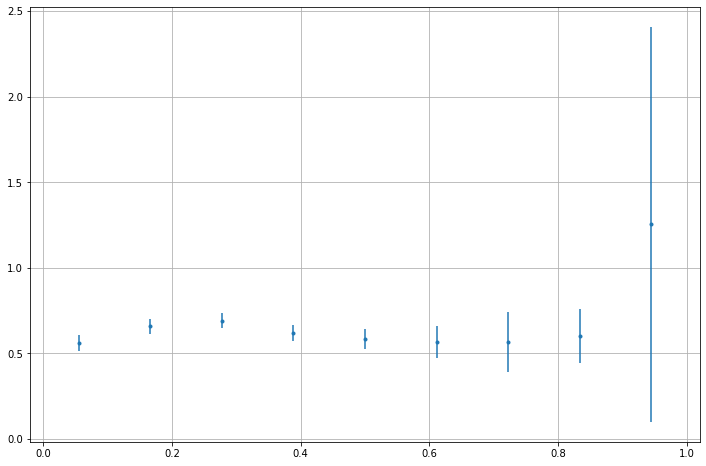

In [51]:
plt.figure(figsize=(12,8))
plt.errorbar(E_H, ratio, yerr=errors, fmt='.')
plt.xlim(-0.02,1.02)
plt.grid()
plt.show()

# Combining Files

To get the error lower, the same analysis is repeated, but then with 50 files.

In [52]:
filenames = ["/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.101.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.102.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.103.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.104.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.105.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.106.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.107.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.108.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.109.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.110.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.111.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.112.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.113.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.114.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.115.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.116.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.117.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.118.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.119.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.120.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.121.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.122.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.123.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.124.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.125.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.126.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.127.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.128.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.129.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.130.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.131.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.132.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.133.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.134.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.135.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.136.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.137.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.138.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.139.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.140.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.141.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.142.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.143.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.144.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.145.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.146.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.147.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.148.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.149.root",
             "/dcache/antares/detector_data/mc/atm-neutrinos/V7.00/generator/KM3NeT_00000049/mcv7.0.gsg_muon-NC_100-500GeV.150.root"]
       
bjorken_x = np.array([])
cross_section = np.array([])
energies = np.array([])
nucleus = np.array([])
interaction_channel = np.array([])
for filename in filenames:
    f = km3io.OfflineReader(data_path(filename))
    bjorken_x = np.concatenate((bjorken_x,np.array(f.w2list[:,7])))
    cross_section = np.concatenate((cross_section,np.array(f.w2list[:,14]))) #Diff cs
    energies = np.concatenate((energies,np.array(f.mc_tracks.E[:,0])))
    nucleus = np.concatenate((nucleus,np.array(f.mc_tracks.pdgid[:,1])))
    interaction_channel = np.concatenate((interaction_channel,np.array(f.w2list[:,9])))
             

In [53]:
bjorken_x_H = bjorken_x[nucleus==2212]
cross_section_H = cross_section[nucleus==2212]
energies_H = energies[nucleus==2212]
interaction_channel_H = interaction_channel[nucleus==2212]

bjorken_x_O = bjorken_x[nucleus==1000080160]
cross_section_O = cross_section[nucleus==1000080160]
energies_O = energies[nucleus==1000080160]
interaction_channel_O = interaction_channel[nucleus==1000080160]

boolean_H = (energies_H > 100) * (energies_H < 110)
boolean_O = (energies_O > 100) * (energies_O < 110)

In [54]:
E_H, cs_H, err_H = process_bins_with_error(cross_section_H[boolean_H],interaction_channel_H[boolean_H],bjorken_x_H[boolean_H],0,1,'linear',10)
E_O, cs_O, err_O = process_bins_with_error(cross_section_O[boolean_O],interaction_channel_O[boolean_O],bjorken_x_O[boolean_O],0,1,'linear',10)




In [55]:
norm = 16

In [56]:
ratio = (cs_O/norm)/cs_H
errors = (err_H/cs_H) + ((cs_O/norm)*(err_O/norm))/cs_H**2

/project/antares/jurjanbootsma/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/project/antares/jurjanbootsma/venv/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


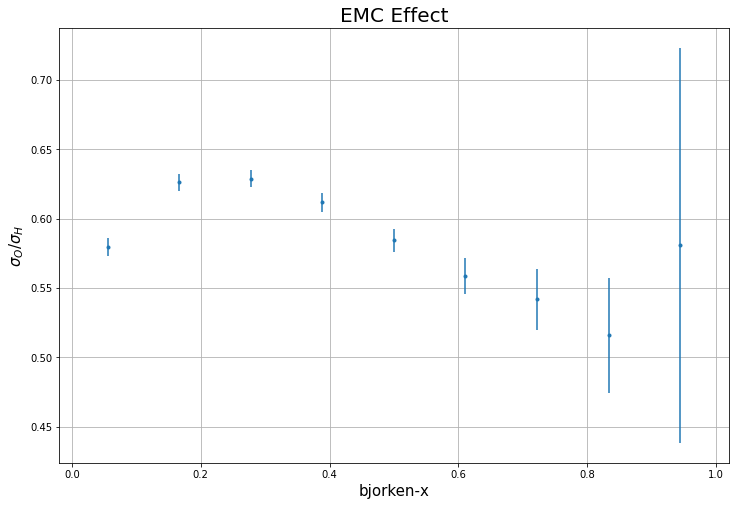

In [57]:
fig=plt.figure(figsize=(12,8))
plt.title("EMC Effect", fontsize=20)
plt.ylabel(r"$\sigma_O/\sigma_H$",fontsize=15)
plt.xlabel("bjorken-x",fontsize=15)
plt.errorbar(E_H, ratio, yerr=errors, fmt='.')
plt.xlim(-0.02,1.02)
plt.grid()
plt.show()